In [4]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from keras.regularizers import l2, l1
import sklearn

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Part 1
### i).


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

N = 100
batchsize = 512
epoch_count = 200
split1 = 1/6

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

train_images = train_images.reshape( (60000, 28 * 28) )
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape( (10000, 28 * 28) )
test_images = test_images.astype('float32') / 255

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
fit = network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)



In [ ]:
training_error = fit.history['loss']
training_acc = fit.history['acc']
vali_error = fit.history['val_loss']
vali_acc = fit.history['val_acc']
x_vals = np.arange(1, epoch_count+1)

plt.plot(x_vals, training_acc, 'r',label='Training Accuracy')
plt.plot(x_vals, vali_acc, 'b',label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy by Epoch")
plt.legend()

plt.plot(x_vals, training_error, 'r',label='Training Accuracy')
plt.plot(x_vals, vali_error, 'r',label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error by Epoch")
plt.legend()



In [5]:
index_min = np.argmin(vali_error)
print(f"The optimal epoch is {index_min}".)

The optimal epoch is 3


### ii.

In [ ]:
drop_network = models.Sequential()

drop_network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))


drop_network.add(layers.Dense(10, activation='softmax'))
drop_network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
drop_fit = drop_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

In [ ]:
drop_val_error = drop_fit.history['val_loss']
drop_val_acc = drop_fit.history['val_acc']
x_vals = np.arange(1, epoch_count+1)

plt.plot(x_vals, drop_val_error,'r',label='Dropped')
plt.plot(x_vals, vali_error,'b',label='Original')
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by epoch")
plt.legend()

plt.plot(x_vals, drop_val_acc,'r',label='Dropped')
plt.plot(x_vals, vali_acc,'b',label='Original')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy by epoch")
plt.legend()

The new model is doing better. 

### iii.

In [ ]:

# build artchicture - L1 regularization# build  
# build artchicture

l1_network = models.Sequential()
l1_network.add(layers.Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(28 * 28,)))


l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))

l1_network.add(layers.Dense(10, activation='softmax'))

# build artchicture - L2 regularization
l2_network = models.Sequential()
l2_network.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(28 * 28,)))


l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))


l2_network.add(layers.Dense(10, activation='softmax'))


# Fit the model# Fit th 
l1_network.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l1_fit = l1_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

l2_network.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l2_fit = l2_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

In [ ]:

# Plot the training losses of all 4 models# Plot t 
l1_val_error = l1_fit.history['val_loss']
l1_val_acc = l1_fit.history['val_acc']

l2_val_error = l2_fit.history['val_loss']
l2_val_acc = l2_fit.history['val_acc']

plt.plot(x_vals, drop_val_error, label='Dropped' )
plt.plot(x_vals, vali_error, label='Original')
plt.plot(x_vals, l1_val_error, label='L1')
plt.plot(x_vals, l2_val_error, label='L2')
plt.xlabel("Epoch")
plt.ylabel("Validation error")
plt.title("Validation error by Epoch across Models")
plt.legend()

In [ ]:
min1=np.min(drop_val_error)
min2=np.min(vali_error)
min3=np.min(l1_val_error)
min4=np.min(l2_val_error)
min1,min2,min3,min4

The best model is 

In [ ]:
new_epoch_count =  np.argmin(vali_error) + 1
print("The optimal epoch for the main baseline model is:", new_epoch_count)

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
full_fit = network.fit(train_images, train_labels, epochs=new_epoch_count, batch_size=batchsize)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

## Part 2

In [5]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [6]:
# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

In [7]:
def build_model(layer_list):
    '''
    The layer_list is a list of integers, each denoting a layer to
    add with the corresponding number of nodes
    '''
    model = models.Sequential()
    
    for node_count in layer_list:
        model.add(layers.Dense(node_count, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    
    return model

def cross_validate(model_structure):
    '''
    Given a model structure, returns the avg MSE over 10 k-fold
    cross validation training
    
    This facilitates rapid testing of models
    '''
    
    kf = KFold(n_splits = k)
    cur_fold = 0
    for train_index, test_index in kf.split(train_data):
        cur_fold +=1 

        # Partition the data
        x_train, x_test = train_data[train_index], train_data[test_index]
        y_train, y_test = train_targets[train_index], train_targets[test_index]


        model = build_model(model_structure)
        model.fit(x_train, y_train, epochs=num_epochs, batch_size=1)
        val_mse, val_mae = model.evaluate(x_test, y_test)
        all_scores.append(val_mse)
        print("K-FOLD = {}| MSE = {}".format(cur_fold, val_mse ))

    mean_score = np.mean(all_scores)
    return mean_score

In [8]:
from sklearn.model_selection import KFold
k = 10
num_val_samples = len(train_data) // k
num_epochs = 5
all_scores = []

Epoch 1/5
363/363 [==============================] - 15s 40ms/step - loss: 498.5878 - mean_absolute_error: 20.3623
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 233.9675 - mean_absolute_error: 12.8176
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 76.3699 - mean_absolute_error: 6.1440
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 44.8823 - mean_absolute_error: 4.5857
Epoch 5/5
41/41 [==============================] - 0s 608us/step
K-FOLD = 1| MSE = 59.19306027016989
Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 476.9468 - mean_absolute_error: 19.6879
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 178.8360 - mean_absolute_error: 10.5650
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 58.0094 - mean_absolute_error: 4.9907
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 39.6259 - mean_absolute_error: 4.1126
E

364/364 [==============================] - 1s 4ms/step - loss: 444.4832 - mean_absolute_error: 18.8966
Epoch 2/5
364/364 [==============================] - 1s 2ms/step - loss: 123.4277 - mean_absolute_error: 8.4230
Epoch 3/5
364/364 [==============================] - 1s 2ms/step - loss: 44.4996 - mean_absolute_error: 4.3430
Epoch 4/5
364/364 [==============================] - 1s 2ms/step - loss: 34.8213 - mean_absolute_error: 3.7804
Epoch 5/5
40/40 [==============================] - 0s 4ms/step
K-FOLD = 6| MSE = 12.959951400756836
Epoch 1/5
364/364 [==============================] - 1s 4ms/step - loss: 435.2897 - mean_absolute_error: 18.7503
Epoch 2/5
364/364 [==============================] - 1s 2ms/step - loss: 136.5617 - mean_absolute_error: 8.6345
Epoch 3/5
364/364 [==============================] - 1s 2ms/step - loss: 57.0925 - mean_absolute_error: 5.0177
Epoch 4/5
364/364 [==============================] - 1s 2ms/step - loss: 42.5035 - mean_absolute_error: 4.2391
Epoch 5/5
40/40 

363/363 [==============================] - 2s 5ms/step - loss: 352.7192 - mean_absolute_error: 16.2110
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 71.9612 - mean_absolute_error: 5.9476
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 41.0430 - mean_absolute_error: 4.2076
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 31.2097 - mean_absolute_error: 3.7048
Epoch 5/5
41/41 [==============================] - 0s 7ms/step
K-FOLD = 1| MSE = 47.187937689990534
Epoch 1/5
363/363 [==============================] - 2s 5ms/step - loss: 389.8057 - mean_absolute_error: 17.3231
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 88.9373 - mean_absolute_error: 6.4637
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 40.7089 - mean_absolute_error: 4.1513
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 30.3976 - mean_absolute_error: 3.6171
Epoch 5/5
41/41 [=

364/364 [==============================] - 2s 6ms/step - loss: 395.4870 - mean_absolute_error: 17.2022
Epoch 2/5
364/364 [==============================] - 1s 3ms/step - loss: 83.7889 - mean_absolute_error: 6.1700
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 43.3328 - mean_absolute_error: 4.2752
Epoch 4/5
364/364 [==============================] - 1s 3ms/step - loss: 32.2509 - mean_absolute_error: 3.6035
Epoch 5/5
40/40 [==============================] - 0s 12ms/step
K-FOLD = 6| MSE = 13.776421546936035
Epoch 1/5
364/364 [==============================] - 2s 6ms/step - loss: 362.5175 - mean_absolute_error: 16.6239
Epoch 2/5
364/364 [==============================] - 1s 3ms/step - loss: 76.1079 - mean_absolute_error: 5.7739
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 37.9565 - mean_absolute_error: 4.0023
Epoch 4/5
364/364 [==============================] - 1s 3ms/step - loss: 29.2208 - mean_absolute_error: 3.4809
Epoch 5/5
40/40 [

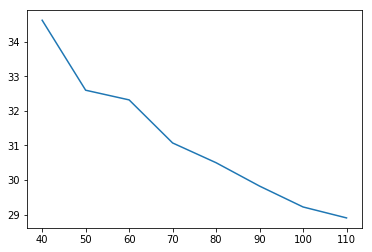

In [9]:
# Use functionality to determine optimal node count, given one layer
node_sizes = np.arange(40, 120, 10)
scores = []
for count in node_sizes:
    structure = [count]
    score = cross_validate(structure)
    print("Layer 1 has {} nodes - yields MSE = {}".format(count, score))
    scores.append(score)

min_mse_size = node_sizes[ np.argmin(scores) ]
print("With 1 layer optimal node count is:", min_mse_size)

# quick plot of MSE as function of node size
plt.plot(node_sizes, scores)
plt.xlabel("Node Size")
plt.ylabel("Score")
plt.title("Node Sizes VS Scores")
plt.show()

In [11]:

strcutures=[[10,20],[100,200],[10,20,30],[100,200,300],[10,20,30,40],[100,200,300,400]]
mse_scores=[]

for i,structure in enumerate(structures):
    score = cross_validate(structure)
    mse_scores.append(score)
    print (f"Model {i} with parameters {structures[i]} has MSE of {score}.")

index_mse = np.argmin(mse_scores)
print (structures[i])

AttributeError: 'list' object has no attribute 'Sequential'

In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from keras.regularizers import l2, l1

## Part 1
### i).


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

N = 100
batchsize = 512
epoch_count = 200
split1 = 1/6

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

train_images = train_images.reshape( (60000, 28 * 28) )
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape( (10000, 28 * 28) )
test_images = test_images.astype('float32') / 255

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
fit = network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)



training_error = fit.history['loss']
training_acc = fit.history['acc']
vali_error = fit.history['val_loss']
vali_acc = fit.history['val_acc']
x_vals = np.arange(1, epoch_count+1)

plt.plot(x_vals, training_acc, 'r',label='Training Accuracy')
plt.plot(x_vals, vali_acc, 'b',label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy by Epoch")
plt.legend()

plt.plot(x_vals, training_error, 'r',label='Training Accuracy')
plt.plot(x_vals, vali_error, 'r',label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error by Epoch")
plt.legend()



index_min = np.argmin(vali_error)
print(f"The optimal epoch is {index_min}".)

### ii.

drop_network = models.Sequential()

drop_network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))

drop_network.add(layers.Dense(512, activation='relu'))
drop_network.add(layers.Dropout(0.5))


drop_network.add(layers.Dense(10, activation='softmax'))
drop_network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
drop_fit = drop_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

drop_val_error = drop_fit.history['val_loss']
drop_val_acc = drop_fit.history['val_acc']
x_vals = np.arange(1, epoch_count+1)

plt.plot(x_vals, drop_val_error,'r',label='Dropped')
plt.plot(x_vals, vali_error,'b',label='Original')
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Validation Error by epoch")
plt.legend()

plt.plot(x_vals, drop_val_acc,'r',label='Dropped')
plt.plot(x_vals, vali_acc,'b',label='Original')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy by epoch")
plt.legend()

The new model is doing better. 

### iii.


# build artchicture - L1 regularization# build  
# build artchicture

l1_network = models.Sequential()
l1_network.add(layers.Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(28 * 28,)))


l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
l1_network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))

l1_network.add(layers.Dense(10, activation='softmax'))

# build artchicture - L2 regularization
l2_network = models.Sequential()
l2_network.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(28 * 28,)))


l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
l2_network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))


l2_network.add(layers.Dense(10, activation='softmax'))


# Fit the model# Fit th 
l1_network.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l1_fit = l1_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)

l2_network.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['acc'])
l2_fit = l2_network.fit(train_images, train_labels, epochs=epoch_count, batch_size=batchsize, validation_split=split1)


# Plot the training losses of all 4 models# Plot t 
l1_val_error = l1_fit.history['val_loss']
l1_val_acc = l1_fit.history['val_acc']

l2_val_error = l2_fit.history['val_loss']
l2_val_acc = l2_fit.history['val_acc']

plt.plot(x_vals, drop_val_error, label='Dropped' )
plt.plot(x_vals, vali_error, label='Original')
plt.plot(x_vals, l1_val_error, label='L1')
plt.plot(x_vals, l2_val_error, label='L2')
plt.xlabel("Epoch")
plt.ylabel("Validation error")
plt.title("Validation error by Epoch across Models")
plt.legend()

min1=np.min(drop_val_error)
min2=np.min(vali_error)
min3=np.min(l1_val_error)
min4=np.min(l2_val_error)
min1,min2,min3,min4

The best model is 

new_epoch_count =  np.argmin(vali_error) + 1
print("The optimal epoch for the main baseline model is:", new_epoch_count)

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
full_fit = network.fit(train_images, train_labels, epochs=new_epoch_count, batch_size=batchsize)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

## Part 2

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

def build_model(layer_list):
    '''
    The layer_list is a list of integers, each denoting a layer to
    add with the corresponding number of nodes
    '''
    model = models.Sequential()
    
    for node_count in layer_list:
        model.add(layers.Dense(node_count, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    
    return model

def cross_validate(model_structure):
    '''
    Given a model structure, returns the avg MSE over 10 k-fold
    cross validation training
    
    This facilitates rapid testing of models
    '''
    
    kf = KFold(n_splits = k)
    cur_fold = 0
    for train_index, test_index in kf.split(train_data):
        cur_fold +=1 

        # Partition the data
        x_train, x_test = train_data[train_index], train_data[test_index]
        y_train, y_test = train_targets[train_index], train_targets[test_index]


        model = build_model(model_structure)
        model.fit(x_train, y_train, epochs=num_epochs, batch_size=1)
        val_mse, val_mae = model.evaluate(x_test, y_test)
        all_scores.append(val_mse)
        print("K-FOLD = {}| MSE = {}".format(cur_fold, val_mse ))

    mean_score = np.mean(all_scores)
    return mean_score

from sklearn.model_selection import KFold
k = 10
num_val_samples = len(train_data) // k
num_epochs = 5
all_scores = []

# Use functionality to determine optimal node count, given one layer
node_sizes = np.arange(40, 120, 10)
scores = []
for count in node_sizes:
    structure = [count]
    score = cross_validate(structure)
    print("Layer 1 has {} nodes - yields MSE = {}".format(count, score))
    scores.append(score)

min_mse_size = node_sizes[ np.argmin(scores) ]
print("With 1 layer optimal node count is:", min_mse_size)

# quick plot of MSE as function of node size
plt.plot(node_sizes, scores)
plt.show()


models=[[10,20],[100,200],[10,20,30],[100,200,300],[10,20,30,40],[100,200,300,400]
mse_scores=[]

for i,model in enumerate(models):
    score = cross_validate(model)
    mse_scores.append(score)
    print (f"Model {i} with parameters {models[i]} has MSE of {score}.")

index_mse = np.argmin(mse_scores)
print (models[i])